In [1]:
words = open('names.txt', 'r', encoding = 'utf-8').read().splitlines()

In [2]:
words[:10]

['გოცაგ',
 'დათა',
 'ქსიაოიან',
 'მიშაილ',
 'ქამალა',
 'ყაზარ',
 'ტესი',
 'აილას',
 'ქიმიარა',
 'მაჰატმაჯი']

In [3]:
max(len(w) for w in words)

14

In [4]:
max(w for w in words)

'ჰფილორეტა'

In [16]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi = {s: i for s, i in stoi.items() if i >= 10}
stoi = {i: s+1 for s, i in enumerate(stoi)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi, itos


({'ა': 1,
  'ბ': 2,
  'გ': 3,
  'დ': 4,
  'ე': 5,
  'ვ': 6,
  'ზ': 7,
  'თ': 8,
  'ი': 9,
  'კ': 10,
  'ლ': 11,
  'მ': 12,
  'ნ': 13,
  'ო': 14,
  'პ': 15,
  'ჟ': 16,
  'რ': 17,
  'ს': 18,
  'ტ': 19,
  'უ': 20,
  'ფ': 21,
  'ქ': 22,
  'ღ': 23,
  'ყ': 24,
  'შ': 25,
  'ჩ': 26,
  'ც': 27,
  'ძ': 28,
  'წ': 29,
  'ჭ': 30,
  'ხ': 31,
  'ჯ': 32,
  'ჰ': 33,
  '.': 0},
 {1: 'ა',
  2: 'ბ',
  3: 'გ',
  4: 'დ',
  5: 'ე',
  6: 'ვ',
  7: 'ზ',
  8: 'თ',
  9: 'ი',
  10: 'კ',
  11: 'ლ',
  12: 'მ',
  13: 'ნ',
  14: 'ო',
  15: 'პ',
  16: 'ჟ',
  17: 'რ',
  18: 'ს',
  19: 'ტ',
  20: 'უ',
  21: 'ფ',
  22: 'ქ',
  23: 'ღ',
  24: 'ყ',
  25: 'შ',
  26: 'ჩ',
  27: 'ც',
  28: 'ძ',
  29: 'წ',
  30: 'ჭ',
  31: 'ხ',
  32: 'ჯ',
  33: 'ჰ',
  0: '.'})

In [19]:
import torch

N = torch.zeros((34, 34), dtype = torch.int32)

for w in words:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    if ch1 in stoi and ch2 in stoi:
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      N[ix1, ix2] += 1

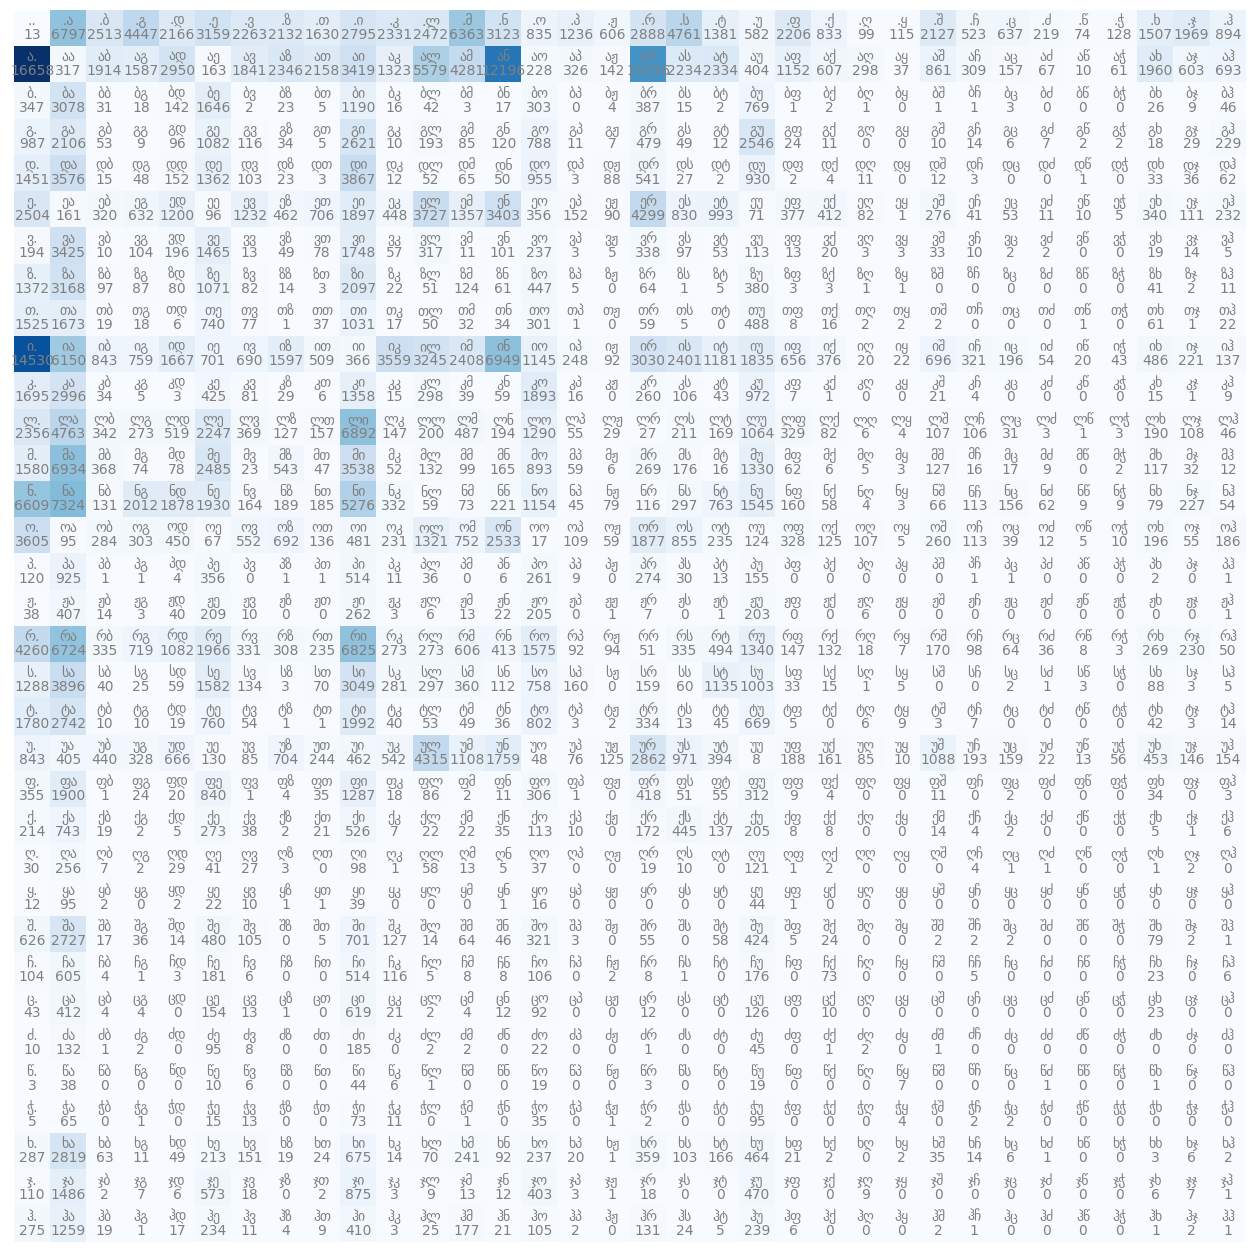

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(34):
  for j in range(34):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [23]:
N_trigram = torch.zeros((34,34,34), dtype = torch.int32)

In [24]:
for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.'] + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    if ch1 in stoi and ch2 in stoi and ch3 in stoi:
      # print(ch1, ch2, ch3)
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      ix3 = stoi[ch3]
      # print(ix1, ix2, ix3)
      N_trigram[ix1, ix2, ix3] += 1

In [25]:
P_trigram = (N_trigram + 1).float()
context_sums = P_trigram.sum(dim=2, keepdim=True)
P_trigram = P_trigram / context_sums
P_trigram

tensor([[[2.4295e-04, 1.0323e-01, 3.8174e-02,  ..., 2.2898e-02,
          2.9914e-02, 1.3590e-02],
         [1.4639e-04, 4.0990e-03, 5.9142e-02,  ..., 1.5664e-02,
          1.2590e-02, 8.4907e-03],
         [7.8524e-04, 4.5662e-01, 3.9262e-04,  ..., 3.9262e-04,
          3.9262e-04, 4.7114e-03],
         ...,
         [6.4893e-04, 5.2304e-01, 6.4893e-04,  ..., 6.4893e-04,
          6.4893e-04, 6.4893e-04],
         [4.9925e-04, 3.7993e-01, 4.9925e-04,  ..., 9.9850e-04,
          4.9925e-04, 4.9925e-04],
         [1.0776e-03, 5.3233e-01, 1.0776e-03,  ..., 1.0776e-03,
          1.0776e-03, 1.0776e-03]],

        [[9.9796e-01, 5.9909e-05, 5.9909e-05,  ..., 5.9909e-05,
          5.9909e-05, 5.9909e-05],
         [4.0000e-02, 2.8571e-03, 4.2857e-02,  ..., 2.5714e-02,
          5.7143e-03, 8.5714e-03],
         [7.1760e-02, 2.5813e-01, 1.3423e-02,  ..., 4.6464e-03,
          5.1626e-03, 8.2602e-03],
         ...,
         [6.8775e-02, 2.8715e-01, 2.1084e-02,  ..., 1.0040e-03,
          2.008

In [26]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.'] + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    if ch1 in stoi and ch2 in stoi and ch3 in stoi:
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      ix3 = stoi[ch3]
      prob = P_trigram[ix1, ix2, ix3]
      # print(prob) | JUST FOR TEST, DON"T DO IT PLEASE.
      logprob = torch.log(prob)
      log_likelihood += logprob
      n += 1

nll = -log_likelihood
loss = nll / n
loss.item()

2.071791887283325

In [35]:
g = torch.Generator().manual_seed(113+12)

for i in range(10):
  out = []
  context = [0, 0]
  while True:
    ix1 = context[0]
    ix2 = context[1]
    p = P_trigram[ix1, ix2, :]
    next_ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    context = [context[1], next_ix]
    out.append(itos[next_ix])
    if next_ix == 0:
      break
  print(''.join(out))

კაბ.
პი.
მანაკ.
კი.
მადიმში.
შმარ.
არ.
ბალაფ.
ნისტაბიჯა.
სკვასტ.


In [36]:
from sklearn.model_selection import train_test_split

words_train, words_temp = train_test_split(words, test_size = 0.2, random_state = 42)
words_val, words_test = train_test_split(words_temp, test_size = 0.5, random_state = 42)

len(words_train), len(words_val), len(words_test)

(52662, 6583, 6583)

In [47]:
strength = 0.0001

results = {}

learning_rate = 50 # You might need to adjust this
training_steps = 2000 # More steps might be needed

In [37]:
# Build Dataset
def build_dataset(words_split, stoi):
  xs, ys = [], []

  for w in words_split:
    chs = ['.', '.'] + list(w) + ['.']

    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
      if ch1 in stoi and ch2 in stoi and ch3 in stoi:
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]

        # Append the context pair to xs
        xs.append([ix1, ix2])
        # Append the target to ys
        ys.append(ix3)

  xs = torch.tensor(xs)
  ys = torch.tensor(ys)

  print(f"Built dataset with {len(xs)} examples.")
  return xs, ys


xs_train, ys_train = build_dataset(words_train, stoi)

# Build the development (validation) set
xs_dev, ys_dev = build_dataset(words_val, stoi)

# Build the test set
xs_test, ys_test = build_dataset(words_test, stoi)

# You can check the shapes to be sure
print("Training set shapes:", xs_train.shape, ys_train.shape)
print("Dev set shapes:", xs_dev.shape, ys_dev.shape)
print("Test set shapes:", xs_test.shape, ys_test.shape)

Built dataset with 393808 examples.
Built dataset with 49365 examples.
Built dataset with 49140 examples.
Training set shapes: torch.Size([393808, 2]) torch.Size([393808])
Dev set shapes: torch.Size([49365, 2]) torch.Size([49365])
Test set shapes: torch.Size([49140, 2]) torch.Size([49140])


In [48]:
# Evaluation + Training

import torch.nn.functional as F

print(f"--- Training with L2 strength: {strength} ---")

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((34, 34, 34), generator = g, requires_grad = True)

for i in range(training_steps):
  # Forward Pass
  ix1, ix2 = xs_train[:, 0], xs_train[:, 1]
  logits = W[ix1, ix2]

  # Calculate the loss
  loss = F.cross_entropy(logits, ys_train) + strength * (W**2).mean()

  # Backard pass & update
  W.grad = None
  loss.backward()
  W.data += -learning_rate * W.grad

with torch.no_grad():
  ix1_train, ix2_train = xs_train[:, 0], xs_train[:, 1]
  logits_train = W[ix1_train, ix2_train]
  train_loss = F.cross_entropy(logits_train, ys_train)

  # Calculate final dev loss
  ix1_dev, ix2_dev = xs_dev[:, 0], xs_dev[:, 1]
  logits_dev = W[ix1_dev, ix2_dev]
  dev_loss = F.cross_entropy(logits_dev, ys_dev)

results[strength] = {'train_loss': train_loss.item(), 'dev_loss': dev_loss.item()}
print(f"  Train loss: {train_loss.item():.4f}, Dev loss: {dev_loss.item():.4f}")

--- Training with L2 strength: 0.0001 ---
  Train loss: 2.3651, Dev loss: 2.3853


In [49]:
with torch.no_grad():
  ix1_test, ix2_test = xs_test[:, 0], xs_test[:, 1]
  logits_test = W[ix1_test, ix2_test] # Using the final W from the best run
  test_loss = F.cross_entropy(logits_test, ys_test)

  results[strength] = {'train_loss': train_loss.item(), 'dev_loss': dev_loss.item()}
  print(f"  Train loss: {train_loss.item():.4f}, Dev loss: {dev_loss.item():.4f}")
  print(f"Final Test Loss: {test_loss.item():.4f}")

  Train loss: 2.3651, Dev loss: 2.3853
Final Test Loss: 2.3864


In [55]:
g = torch.Generator().manual_seed(2147483)

print("\n--- Sampling from the trained model ---")
for i in range(10): # Let's generate 10 names
  out = []
  context = [0, 0] # Start with '..'
  while True:

    ix1, ix2 = context[0], context[1]
    logits = W[ix1, ix2, :]
    counts = logits.exp()
    p = counts / counts.sum()

    next_ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

    context = [context[1], next_ix]
    out.append(itos[next_ix])
    if next_ix == 0:
      break

  print(''.join(out))


--- Sampling from the trained model ---
რუ.
ავალი.
უმიმათ.
ნა.
პოლი.
მანდრესი.
ხადილი.
შინგულა.
სოიულა.
ჯაეჰპკჟლა.
